In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
from metrics.classification import ClassificationMatrix as CM
import numpy as np
import matplotlib.pyplot as plt

# Changing the correct predictions incrementally 

> Let us assume a _balanced binary classification_ problem. We use an imaginary test set with 100 targets that has 50-50 A-B classes.

> To show how the classification measures change, according to the performance of the classifier, we assume the predictions are all wrong. 

> By increasing the number of correctly classified predictions, we will see the plots of different measures, until the predictions and target test sets become 100% identical, i.e. 100% accuracy.

In [4]:
# 100 Binray class, divided to 50-50 cassert
targets = np.r_[["A"] * 50, ["B"]*50]
# Predictions at start are opposite of the targets
# ,so, the prediction gets everything wrong
predictions = targets[::-1].copy()
# The classification matrix class
m = CM(predictions, targets, classSymbol = "A")

print("Confusion Matrix for the starting prediction set:")
print(f"True Positives:{m.TP()}, False Negative:{m.FN()}")
print(f"False Positive:{m.FP()}, True Negative :{m.TN()}")
print()
print("Or as numpy matrix:")
print(m.conf_matrix)
print()
print(
    f"Accuracy starts from:{m.accuracy()}"
f", Percision:{m.precision()}"
f" and Recall:{m.recall()}.")

Confusion Matrix for the starting prediction set:
True Positives:0.0, False Negative:50.0
False Positive:50.0, True Negative :0.0

Or as numpy matrix:
[[ 0. 50.]
 [50.  0.]]

Accuracy starts from:0.0, Percision:0.0 and Recall:0.0.


In [7]:
accuracies = np.zeros(targets.shape)
precisions = np.zeros(targets.shape)
recalls = np.zeros(targets.shape)
specificities = np.zeros(targets.shape)
f1 = np.zeros(targets.shape)

targets_len = targets.shape[0]
model_numbers = range(0, targets.shape[0])
# Predictions at start are opposite of the targets
predictions = targets[::-1].copy()


for i,_ in enumerate(targets):
    # New classificatin meaures for new predictions
    m = CM(predictions, targets, classSymbol = "A")
    
    accuracies[i] = m.accuracy()
    precisions[i] = m.precision()
    recalls[i] = m.recall()
    specificities[i] = m.specificity()
    f1[i] = m.f1()

    # Correct the next predictions
    # One from the class 'A' and the
    # next one from the class 'B'
    if i % 2 == 0:
        predictions[i//2] = "A"
    else:
        predictions[(targets_len-1)-i//2] = "B"

In [29]:
def plot_(title):
    # We turn the values to percentage, before plotting
    plt.plot(model_numbers, accuracies*100, label = "Accuracy")
    plt.plot(model_numbers, precisions*100, label = "Precision")
    plt.plot(model_numbers, recalls*100, label = "Recall")
    plt.plot(model_numbers, specificities*100, label = "Specificity")
    plt.plot(model_numbers, f1*100, label = "F1")
    plt.legend()
    plt.title(title)
    plt.ylabel("Percentage")
    plt.xlabel("Model-number")
    plt.grid()    


# Comparing models that incrementally improve 

## Case (I): Balanced Improvement

The following plot shows the changes in different classification measures, whenever the 
_True Positives_ (TP) and _True Negatives_ (TN) increase together in predictions. For the first comparison, or model-number zero on x axis, the model gets it all wrong (see the confusion matrix in the previous cell). Therefore , all the measures are zero.


The foregoing models predict one more correct class "A" or "B" consecutively. This is equal to one more TP or one more TN, and as a result, the improvement is *balanced* for both TP and TN.

We see that the accuracy increases linearly, and it is the same for _precision_, _recall_ (or _sensitivity_), _specificity_ and _f1_.

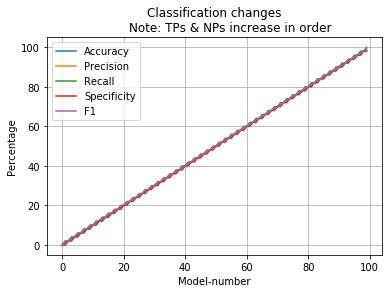

In [11]:
_ = plt.figure(figsize=(6,4))
plot_("""Classification changes
        Note: TPs & NPs increase in order""")
plt.show()

This is what we intuitively expect, but what happens to these measures when the model improvement is not balanced? Or ask it differently, how the model performs when these measures are not equal? Let's study these questions further.

## Case (II): TP detection improves before NP

In [36]:
accuracies = np.zeros(targets.shape)
precisions = np.zeros(targets.shape)
recalls = np.zeros(targets.shape)
specificities = np.zeros(targets.shape)
f1 = np.zeros(targets.shape)
# Predictions at start are opposite of the targets
predictions = targets[::-1].copy()

for i,_ in enumerate(targets):
    # New classificatin meaures for new predictions
    m = CM(predictions, targets, classSymbol = "A")
    
    accuracies[i] = m.accuracy()
    precisions[i] = m.precision()
    recalls[i] = m.recall()
    specificities[i] = m.specificity()
    f1[i] = m.f1()

    # Correct the next TP predictions up to
    # exhusting them, and then start to correct
    # the TNs
    predictions[i] = "A" if i < (targets_len//2) else "B"


Now, we first improve the performance of the classifier by increasing the number of correctly classified "A", or TPs. When all the class "A" in the targets are correctly predicted, we start to improve the class "B"s predictions or TN.

As we see, the accuracy is increasing linearly, therefore using the accuracy alone does not explain the performance of the model with respect to TP and TN. But notice recall and specificity. Recall increases to 100% during the improvement of class "A" predictions while specificity stays at zero. 

After the class "A" detection's maturity, the class "B" predictions improves and TN increases, and therefore, the specificity start to increase.

Precision change is not linear anymore. Notice that precision defines as $\frac{TP}{TP+FP}$. TPs are increasing up to the middle of the plot, while FP is constant (FP = 50%). After that, FP decreases and TP is constant.

And finally, f1 is the combined effects of precision and recall. It is faster in start and slower to the end.

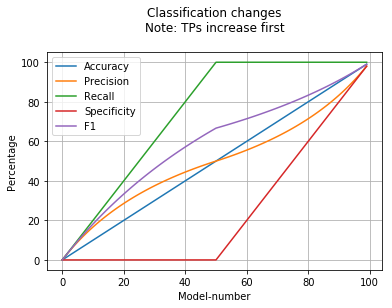

In [39]:
_ = plt.figure(figsize=(6,4))
plot_("""Classification changes
Note: TPs increase first
""")
plt.show()

## Case (III): NP detection improves before TP

In [40]:
accuracies = np.zeros(targets.shape)
precisions = np.zeros(targets.shape)
recalls = np.zeros(targets.shape)
specificities = np.zeros(targets.shape)
f1 = np.zeros(targets.shape)
# Predictions at start are opposite of the targets
predictions = targets[::-1].copy()

for i,_ in enumerate(targets):
    # New classificatin meaures for new predictions
    m = CM(predictions, targets, classSymbol = "A")
    accuracies[i] = m.accuracy()
    precisions[i] = m.precision()
    recalls[i] = m.recall()
    specificities[i] = m.specificity()
    f1[i] = m.f1()   
    

    # Correct the next TN predictions up to
    # exhusting them, and then start to correct
    # the TPs     
    predictions[(targets_len-1)-i] = "B" if i < (targets_len//2) else "A"


In this case, recalls and specificities are exchanged. We can see that the precision is zero for first half and consequently, the f1.

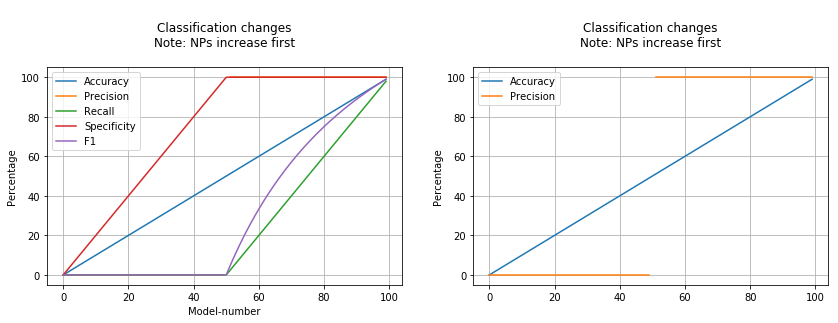

In [41]:
_ = plt.figure(figsize=(14,4))
plt.subplot(121)
plot_("""
Classification changes
Note: NPs increase first
""")
plt.subplot(122)

plt.plot(x, accuracies*100, label = "Accuracy")
plt.plot(x, precisions*100, label = "Precision")
plt.legend()
plt.title("""
Classification changes
Note: NPs increase first
""")
plt.ylabel("Percentage")
plt.grid()
plt.show()

# Conclusion

> We saw that, to correctly interpreting the performance of a classifier, accuracy alone is not enough and we need to add two more measures to understand the performance of the model with respect to TPs and TNs. 

> We saw that the recall and specificity act as a complement of the other, and one has the same insight as the other one (This is true for sensitivity and specificity). So, combining the Precision and one of them is a better choice. 

#### Note: Remember the dataset was _balanced_ (same number of class "A" and "B"). In the case of imbalanced datasets, other measures is needed. e.g. _Matthews correlation coefficient_. 